In [151]:
import numpy as np
from numpy import zeros, eye, array, exp
from numpy.random import randn
from numpy.linalg import solve, norm

from scipy.stats import multivariate_normal as MVN
from scipy.optimize import fsolve

import matplotlib.pyplot as plt

from Manifolds.GeneralizedEllipse import GeneralizedEllipse
from utils import prep_contour, line_perp_v_through_point

In [85]:
μ = zeros(2)
Σ = array([[3.0, 0.0], [0.0, 1.0]])
π = MVN(μ, Σ)
f = π.logpdf
gradf = lambda x: - solve(Σ, x - μ)
z0 = -3

In [14]:
ellipse = GeneralizedEllipse(μ, Σ, exp(z0))

In [22]:
ellipse0 = prep_contour([-3, 3], [-3, 3], 0.01, f)

In [66]:
x0 = ellipse.sample()

In [78]:
v0 = array([0.6, 0.8])

In [81]:
δ = 2

In [82]:
xhalf = x0 + (δ/2)*v0

In [89]:
ghalf = gradf(xhalf)
ghalf_hat = ghalf / norm(ghalf)

In [95]:
v1 = v0 - 2 * ghalf_hat * (ghalf_hat @ v0)

In [97]:
x1 = xhalf + (δ/2)*v1

In [102]:
g1 = gradf(x1)
g1_hat = g1 / norm(g1)

In [152]:
xvalues = np.linspace(-1, 2, 100)

In [158]:
z1 = f(x1)

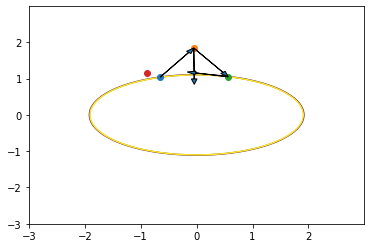

In [160]:
fig, ax = plt.subplots()
ax.contour(*ellipse0, levels=[z0, z1], zorder=0)
ax.scatter(*x0)
ax.scatter(*xhalf)
ax.scatter(*x1)
#ax.scatter(*(x1+(δ/2)*project(-v1, g1_hat)))
ax.scatter(*hug_movement(x1, project(-v1, g1_hat)))
ax.arrow(*x0, *v0, length_includes_head=True, head_width=0.1)
ax.arrow(*xhalf, *ghalf_hat, length_includes_head=True, head_width=0.1)
ax.arrow(*xhalf, *v1, length_includes_head=True, head_width=0.1)
ax.arrow(*x1, *project(-v1, g1_hat), length_includes_head=True, head_width=0.1)
#ax.plot(xvalues, line_perp_v_through_point(g1_hat, x1, xvalues))
plt.show()

array([-0.8928899 ,  1.14882645])

In [139]:
def hug_movement(x_start, v_start):
    x_half     = x_start + (δ/2)*v_start
    ghalf_hat  = gradf(x_half) / norm(gradf(x_half))
    v_final    = project(v_start, ghalf_hat)
    x_final    = x_half + (δ/2)*v_final
    return x_final 

In [140]:
def func(vsample):
    vprime = project(vsample, g1_hat)
    x0prime = hug_movement(x1, vprime)
    return x0 - x0prime

In [141]:
project = lambda v, g: v - g*(g@v)

In [166]:
out = fsolve(func, project(-v1, g1_hat), xtol=1e-10)

In [173]:
def check_norms():
    v_new = project(-v1, g1_hat)
    xhalf = x1 + v_new
    ghalf_hat = gradf(xhalf) / norm(gradf(xhalf))
    v1prime = v_new - 2*ghalf_hat*(ghalf_hat@v_new)
    return norm(v1), norm(v1prime)

In [174]:
check_norms()

(0.9999999999999999, 0.7437286966405865)

In [134]:
x0

array([-0.65111414,  1.04130545])

Consider $\delta=2$
##### Forward
- Given initial position $x_0$, and velocity $v_0$
- Move to midpoint $x_{1/2} = x_0 + v_0$
- Projection matrix $N_{1/2} = J_{1/2}^\top (J_{1/2}J_{1/2}^\top)^{-1} J_{1/2}$
- Reflection matrix $R_{1/2} = I - 2N_{1/2}$
- Reflected velocity $v_1 = R_{1/2}v_0$
- Move to final point $x_1 = x_{1/2} + v_1 = x_0 + v_0 + R_{1/2}v_0$

##### Housekeeping
- New initial velocity $v_0' = T_1(-v_1) = -(I - N_1)v_1$
- New midpoint $x_{1/2}' = x_1 + v_0' = x_0 + v_0 + R_{1/2}v_0 -(I - N_1)v_1= x_0 + 2v_0 -2N_{1/2}v_0 - v_1 + N_1v_1$
- New Projection matrix $N_{1/2}'= J(x_{1/2}')^\top (J(x_{1/2}')J(x_{1/2}')^\top)^{-1} J(x_{1/2}')$
- New Reflection matrix $R_{1/2}' = I - 2N_{1/2}'$
- New Reflected velocity $v_1' = R_{1/2}'v_0'$
- Move to new final point $x_1' = x_{1/2}' + v_1'$